In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [28]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('submission.csv')

In [13]:
train_df.describe()

,bant_submit,com_reg_ver_win_rate,customer_idx,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner
count,59299.000000,14568.000000,59299.000000,13756.000000,3444.0,1121.0,4565.0,59299.000000,59299.000000,59299.000000,18417.000000,15304.000000,59299.000000
mean,0.634593,0.091685,27114.556333,19.912184,1.0,1.0,1.0,79.271590,0.041603,0.050810,0.001117,0.049288,262.563888
std,0.286066,0.150988,14653.911888,44.697938,0.0,0.0,0.0,132.551067,0.199681,0.219612,0.001104,0.027949,231.605681
min,0.000000,0.003788,2.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000002,0.011583,0.000000
25%,0.500000,0.019900,14913.000000,1.000000,1.0,1.0,1.0,7.000000,0.000000,0.000000,0.000298,0.026846,97.000000
50%,0.500000,0.049180,26774.000000,4.000000,1.0,1.0,1.0,29.000000,0.000000,0.000000,0.000572,0.049840,175.000000
75%,1.000000,0.074949,40368.500000,19.000000,1.0,1.0,1.0,92.000000,0.000000,0.000000,0.001183,0.064566,374.000000
max,1.000000,1.000000,47466.000000,1394.000000,1.0,1.0,1.0,1264.000000,1.000000,1.000000,0.003079,0.285714,1114.000000


In [14]:
test_df.describe()

,id,bant_submit,com_reg_ver_win_rate,customer_idx,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner,is_converted
count,5271.000000,5271.000000,1788.000000,5271.000000,1275.000000,593.0,53.0,646.0,5271.000000,5271.000000,5271.000000,2373.000000,1906.000000,5271.000000,0.0
mean,10686.395940,0.605720,0.102336,24664.497629,21.272941,1.0,1.0,1.0,81.816164,0.146841,0.081389,0.001093,0.058388,304.458736,NaN
std,6141.012698,0.365631,0.151790,14615.896802,75.187401,0.0,0.0,0.0,135.063265,0.353981,0.273457,0.001189,0.035738,241.502331,NaN
min,1.000000,0.000000,0.003788,1.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000002,0.011583,0.000000,NaN
25%,5644.000000,0.250000,0.032787,11173.500000,0.000000,1.0,1.0,1.0,3.000000,0.000000,0.000000,0.000060,0.048630,97.000000,NaN
50%,10067.000000,0.500000,0.053892,24151.000000,4.000000,1.0,1.0,1.0,26.000000,0.000000,0.000000,0.000572,0.053571,231.000000,NaN
75%,16019.500000,1.000000,0.075000,37680.000000,19.000000,1.0,1.0,1.0,104.000000,0.000000,0.000000,0.001183,0.064566,428.000000,NaN
max,21340.000000,1.000000,1.000000,47466.000000,2219.000000,1.0,1.0,1.0,1143.000000,1.000000,1.000000,0.003079,0.285714,1108.000000,NaN


In [11]:
train_df['is_converted'].value_counts()

is_converted
False    54449
True      4850
Name: count, dtype: int64

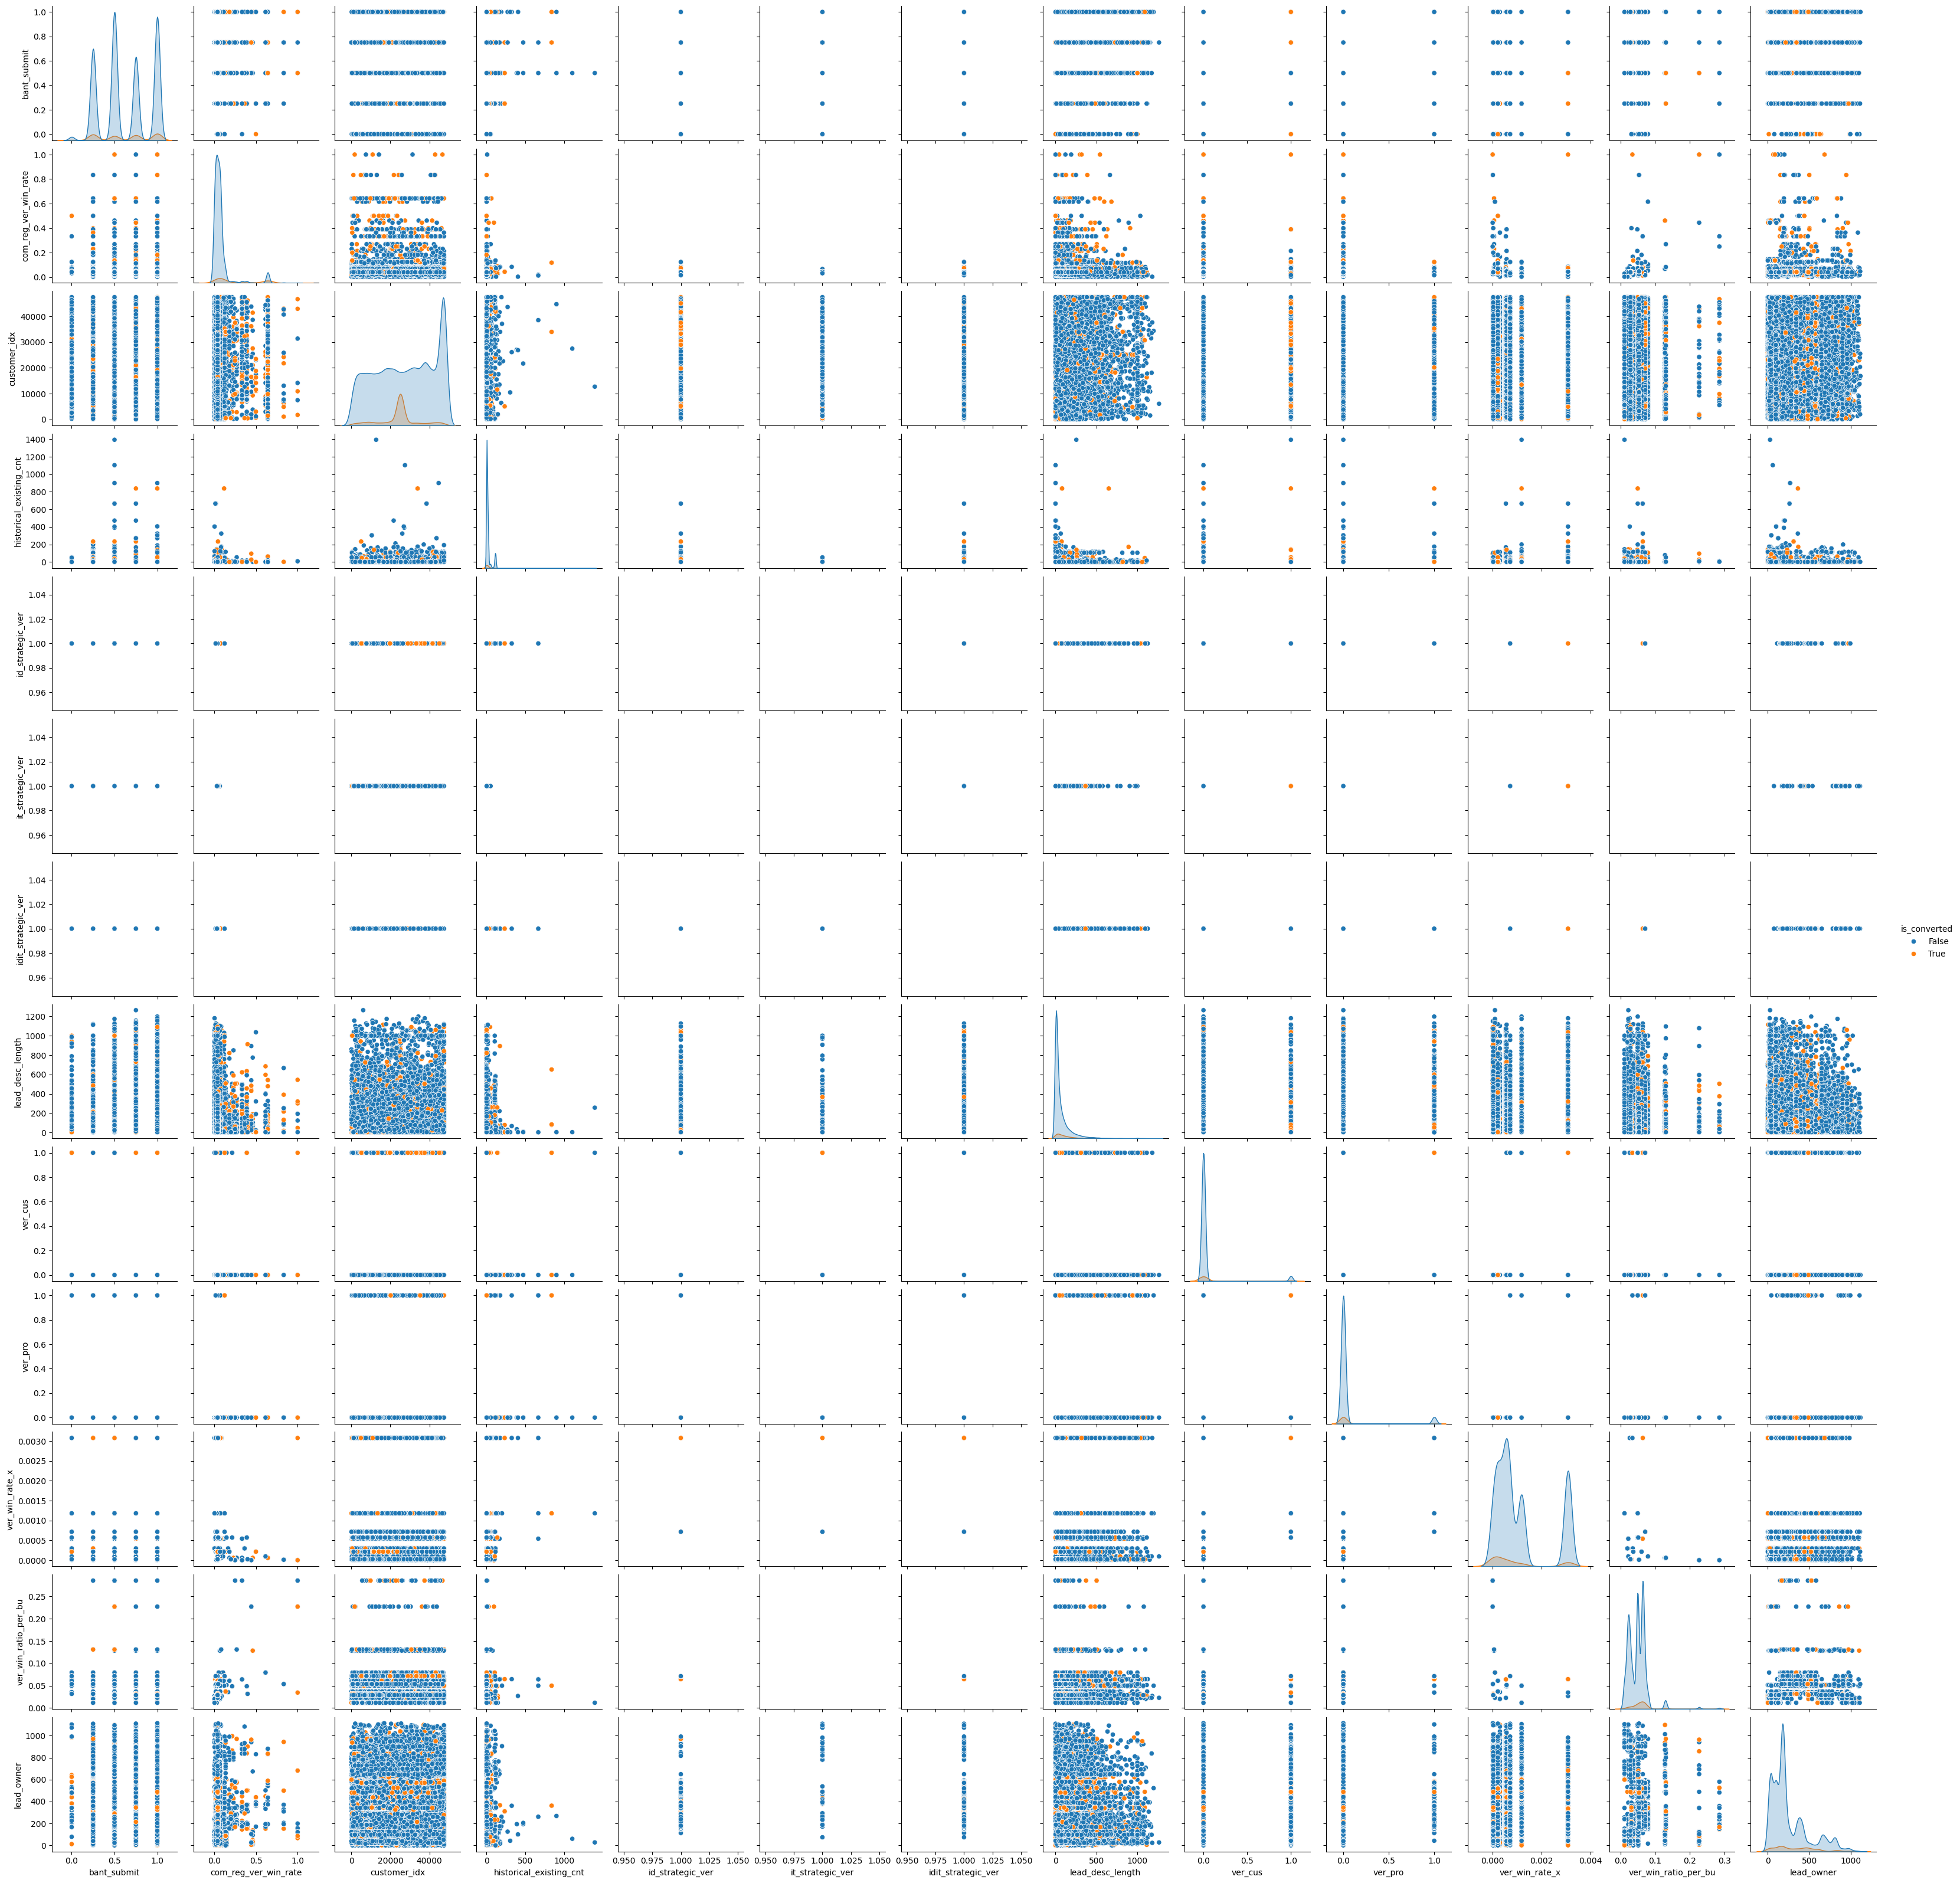

In [12]:
sns.pairplot(train_df, hue='is_converted')

<Axes: xlabel='bant_submit', ylabel='Count'>

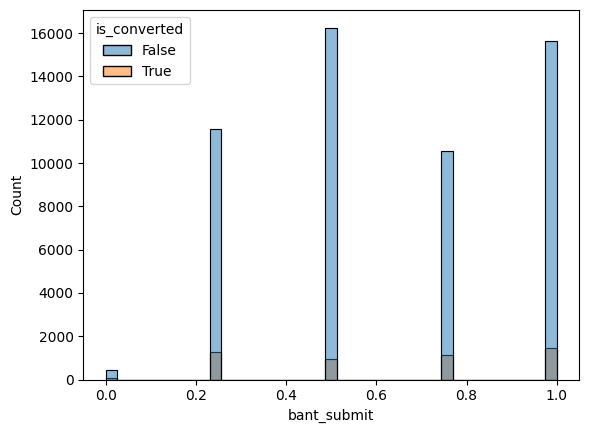

In [17]:
sns.histplot(data=train_df, x='bant_submit', hue='is_converted')

In [48]:
temp_train_df_True = train_df[train_df['is_converted']==True]['customer_country'].value_counts().reset_index()
temp_train_df_True['ratio'] = temp_train_df_True['count']/temp_train_df_True['count'].sum()*100
temp_train_df_True

,customer_country,count,ratio
0,//India,157,3.329799
1,//Hong Kong,134,2.841994
2,//United States,133,2.820785
3,//U.A.E,73,1.548250
4,/Dubai/U.A.E,70,1.484624
...,...,...,...
2061,1525 n 4th st /Renton/,1,0.021209
2062,305 John Street,1,0.021209
2063,3728 PHILIPS HWY SUITE #34 /JACKSONVILLE/,1,0.021209
2064,/Limassol/Cyprus,1,0.021209


In [49]:
temp_train_df_False = train_df[train_df['is_converted']==False]['customer_country'].value_counts().reset_index()
temp_train_df_False['ratio'] = temp_train_df_False['count']/temp_train_df_False['count'].sum()*100
temp_train_df_False

,customer_country,count,ratio
0,//India,2880,5.372934
1,/São Paulo/Brazil,1298,2.421551
2,//United States,829,1.546584
3,//United Kingdom,797,1.486885
4,//Italy,704,1.313384
...,...,...,...
14257,/AMK/Singapore,1,0.001866
14258,"/Sarawak, Miri/Malaysia",1,0.001866
14259,/Saint Martin de Seignanx/France,1,0.001866
14260,/Praha 9/Czech,1,0.001866


In [50]:
pd.merge(temp_train_df_True, temp_train_df_False, how='outer',on='customer_country').sort_values('count_x', ascending=False).head(20)

,customer_country,count_x,ratio_x,count_y,ratio_y
503,//India,157.0,3.329799,2880.0,5.372934
501,//Hong Kong,134.0,2.841994,219.0,0.408567
609,//United States,133.0,2.820785,829.0,1.546584
603,//U.A.E,73.0,1.548250,603.0,1.124958
3372,/Dubai/U.A.E,70.0,1.484624,327.0,0.610052
4307,/Hyderabad/India,53.0,1.124072,455.0,0.848849
6294,/Mumbai/India,52.0,1.102863,542.0,1.011156
571,//Philippines,50.0,1.060445,655.0,1.221969
459,//Brazil,48.0,1.018028,529.0,0.986903
9106,/São Paulo/Brazil,46.0,0.975610,1298.0,2.421551


In [51]:
pd.merge(temp_train_df_True, temp_train_df_False, how='outer',on='customer_country').sort_values('count_y', ascending=False).head(20)

,customer_country,count_x,ratio_x,count_y,ratio_y
503,//India,157.0,3.329799,2880.0,5.372934
9106,/São Paulo/Brazil,46.0,0.975610,1298.0,2.421551
609,//United States,133.0,2.820785,829.0,1.546584
607,//United Kingdom,8.0,0.169671,797.0,1.486885
533,//Italy,3.0,0.063627,704.0,1.313384
580,//Saudi Arabia,33.0,0.699894,685.0,1.277937
571,//Philippines,50.0,1.060445,655.0,1.221969
435,//,21.0,0.445387,648.0,1.208910
603,//U.A.E,73.0,1.548250,603.0,1.124958
493,//Germany,16.0,0.339343,562.0,1.048468


<Axes: xlabel='business_unit', ylabel='Count'>

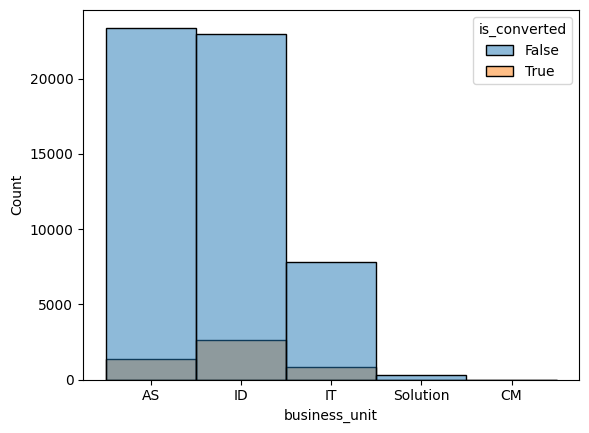

In [53]:
sns.histplot(data=train_df, x='business_unit', hue='is_converted')

<Axes: xlabel='is_converted', ylabel='Count'>

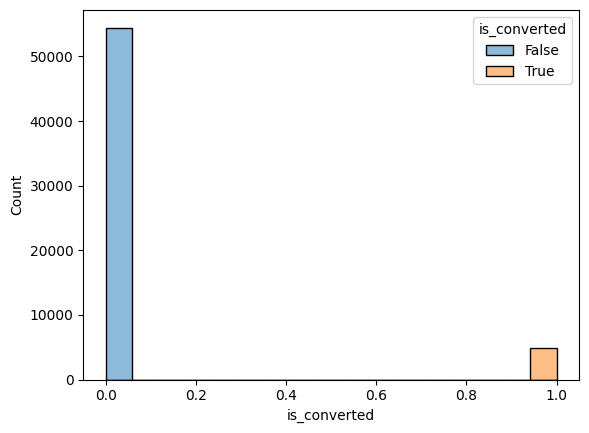

In [54]:
sns.histplot(data=train_df, x='is_converted', hue='is_converted')

<Axes: xlabel='com_reg_ver_win_rate', ylabel='Count'>

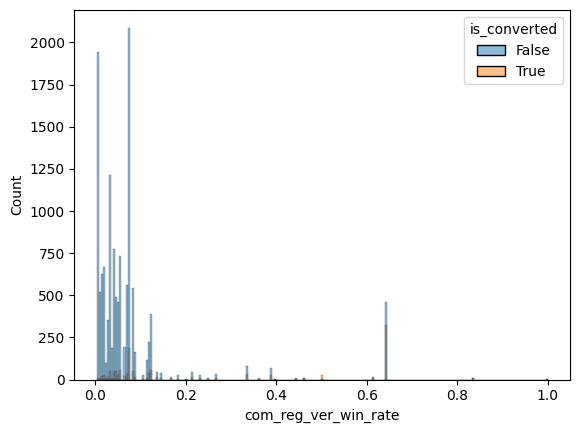

In [55]:
sns.histplot(data=train_df, x='com_reg_ver_win_rate', hue='is_converted')

In [56]:
temp_train_df_True = train_df[train_df['is_converted']==True]['customer_idx'].value_counts().reset_index()
temp_train_df_True['ratio'] = temp_train_df_True['count']/temp_train_df_True['count'].sum()*100
temp_train_df_True

,customer_idx,count,ratio
0,25096,2421,49.917526
1,47466,67,1.381443
2,14746,38,0.783505
3,42108,19,0.391753
4,7740,17,0.350515
...,...,...,...
1721,38872,1,0.020619
1722,24281,1,0.020619
1723,44948,1,0.020619
1724,17779,1,0.020619


In [57]:
temp_train_df_False = train_df[train_df['is_converted']==False]['customer_idx'].value_counts().reset_index()
temp_train_df_False['ratio'] = temp_train_df_False['count']/temp_train_df_False['count'].sum()*100
temp_train_df_False

,customer_idx,count,ratio
0,47466,7619,13.992911
1,37680,363,0.666679
2,18030,330,0.606072
3,21321,161,0.295690
4,33350,135,0.247938
...,...,...,...
33600,29736,1,0.001837
33601,30122,1,0.001837
33602,46848,1,0.001837
33603,18445,1,0.001837


In [58]:
pd.merge(temp_train_df_True, temp_train_df_False, how='outer',on='customer_idx').sort_values('count_x', ascending=False).head(20)

,customer_idx,count_x,ratio_x,count_y,ratio_y
18448,25096,2421.0,49.917526,NaN,NaN
35111,47466,67.0,1.381443,7619.0,13.992911
10722,14746,38.0,0.783505,5.0,0.009183
31172,42108,19.0,0.391753,NaN,NaN
5621,7740,17.0,0.350515,2.0,0.003673
33545,45319,15.0,0.309278,1.0,0.001837
6767,9324,14.0,0.288660,NaN,NaN
19371,26337,13.0,0.268041,1.0,0.001837
3655,5023,11.0,0.226804,1.0,0.001837
7136,9857,11.0,0.226804,NaN,NaN


In [59]:
pd.merge(temp_train_df_True, temp_train_df_False, how='outer',on='customer_idx').sort_values('count_y', ascending=False).head(20)

,customer_idx,count_x,ratio_x,count_y,ratio_y
35111,47466,67.0,1.381443,7619.0,13.992911
27826,37680,4.0,0.082474,363.0,0.666679
13166,18030,1.0,0.020619,330.0,0.606072
15630,21321,1.0,0.020619,161.0,0.295690
24616,33350,NaN,NaN,135.0,0.247938
32124,43395,NaN,NaN,91.0,0.167129
18592,25309,NaN,NaN,90.0,0.165292
24920,33763,NaN,NaN,88.0,0.161619
23806,32240,1.0,0.020619,83.0,0.152436
27803,37654,NaN,NaN,76.0,0.139580


<Axes: xlabel='customer_type', ylabel='Count'>

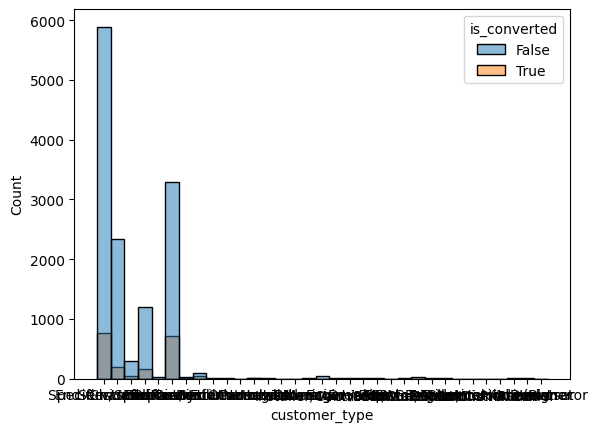

In [60]:
sns.histplot(data=train_df, x='customer_type', hue='is_converted')

<Axes: xlabel='enterprise', ylabel='Count'>

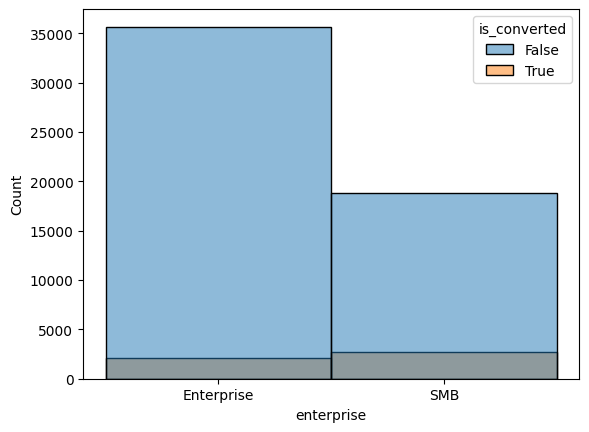

In [61]:
sns.histplot(data=train_df, x='enterprise', hue='is_converted')

<Axes: xlabel='historical_existing_cnt', ylabel='Count'>

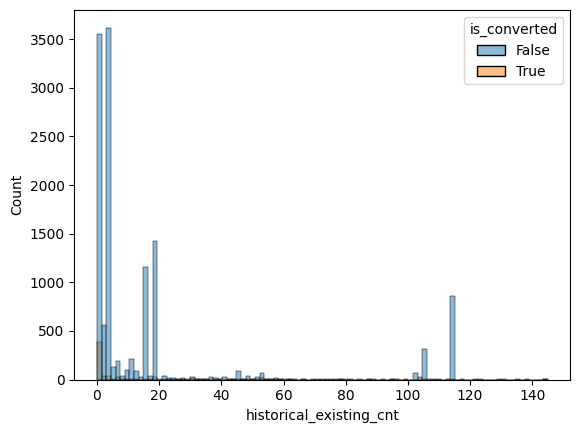

In [81]:
sns.histplot(data=train_df[train_df['historical_existing_cnt']<150], x='historical_existing_cnt', hue='is_converted')

<Axes: xlabel='historical_existing_cnt', ylabel='Count'>

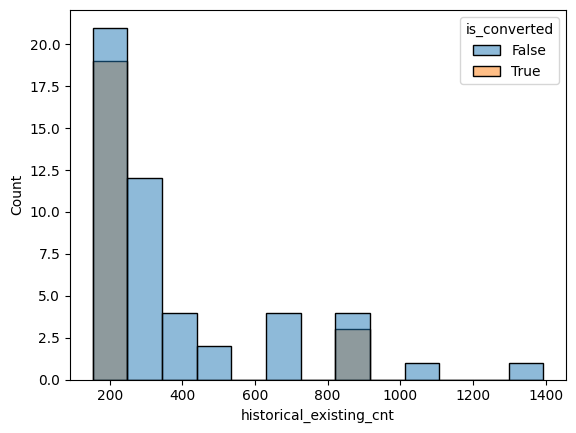

In [80]:
sns.histplot(data=train_df[train_df['historical_existing_cnt']>150], x='historical_existing_cnt', hue='is_converted')

In [87]:
train_df['idit_strategic_ver'].value_counts()

idit_strategic_ver
1.0    4565
Name: count, dtype: int64

In [97]:
test_df['expected_timeline'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5271 entries, 0 to 5270
Series name: expected_timeline
Non-Null Count  Dtype 
--------------  ----- 
2863 non-null   object
dtypes: object(1)
memory usage: 41.3+ KB


In [102]:
train_df[train_df['product_category'].isna()]['business_unit'].value_counts()

business_unit
AS    6656
IT    6545
ID    6173
Name: count, dtype: int64

In [103]:
train_df[train_df['product_category'].notna()]['business_unit'].value_counts()

business_unit
ID          19390
AS          18118
IT           2119
Solution      296
CM              2
Name: count, dtype: int64

In [104]:
train_df[train_df['product_modelname'].isna()]['business_unit'].value_counts()

business_unit
AS          24754
ID          18831
IT           6187
Solution      296
CM              2
Name: count, dtype: int64

In [105]:
train_df[train_df['product_modelname'].notna()]['business_unit'].value_counts()

business_unit
ID    6732
IT    2477
AS      20
Name: count, dtype: int64

In [106]:
train_df['inquiry_type'].value_counts()

inquiry_type
Quotation or purchase consultation                                                                                     23274
Quotation or Purchase Consultation                                                                                     18766
Sales Inquiry                                                                                                           9977
Product Information                                                                                                     1237
Other                                                                                                                    929
                                                                                                                       ...  
quotation_                                                                                                                 1
display product                                                                                                 

In [108]:
test_df['inquiry_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5271 entries, 0 to 5270
Series name: inquiry_type
Non-Null Count  Dtype 
--------------  ----- 
3979 non-null   object
dtypes: object(1)
memory usage: 41.3+ KB


In [110]:
test_df['customer_job']

0                   consulting
1                          NaN
2       information technology
3                        sales
4                  engineering
                 ...          
5266                     sales
5267                       NaN
5268          entrepreneurship
5269                       NaN
5270                       NaN
Name: customer_job, Length: 5271, dtype: object

In [112]:
test_df['customer_type'].value_counts()

customer_type
End Customer             2453
Specifier/ Influencer     788
Channel Partner           327
Solution Eco-Partner      146
Service Partner            98
Developer                   1
End-Customer                1
Name: count, dtype: int64

In [113]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [114]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   bant_submit              5271 non-null   float64
 2   customer_country         5271 non-null   object 
 3   business_unit            5271 non-null   object 
 4   com_reg_ver_win_rate     1788 non-null   float64
 5   customer_idx             5271 non-null   int64  
 6   customer_type            3814 non-null   object 
 7   enterprise               5271 non-null   object 
 8   historical_existing_cnt  1275 non-null   float64
 9   id_strategic_ver         593 non-null    float64
 10  it_strategic_ver         53 non-null     float64
 11  idit_strategic_ver       646 non-null    float64
 12  customer_job             3832 non-null   object 
 13  lead_desc_length         5271 non-null   int64  
 14  inquiry_type            

<Axes: xlabel='lead_desc_length', ylabel='Count'>

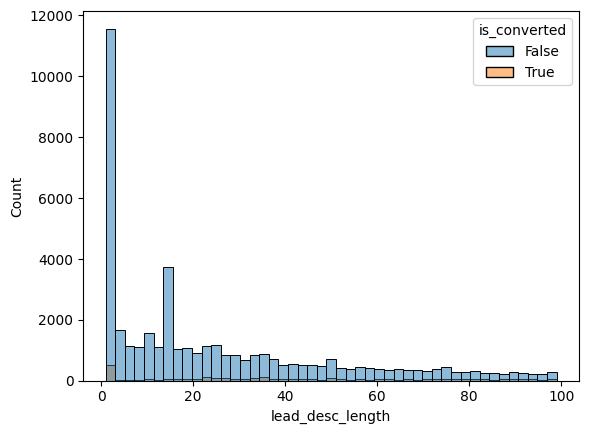

In [119]:
sns.histplot(data=train_df[train_df['lead_desc_length']<100], x='lead_desc_length', hue='is_converted')

<Axes: xlabel='lead_desc_length', ylabel='Count'>

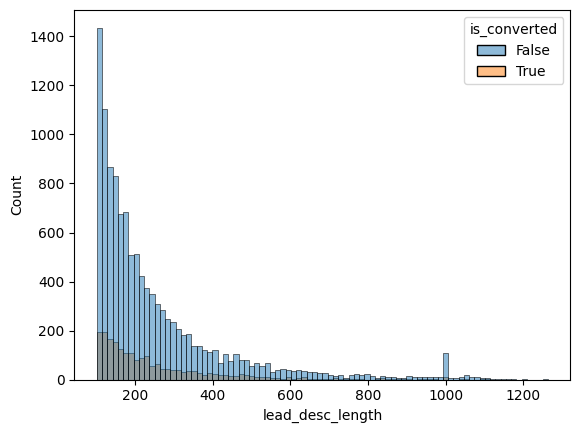

In [118]:
sns.histplot(data=train_df[train_df['lead_desc_length']>100], x='lead_desc_length', hue='is_converted')

In [129]:
set(list(test_df['lead_owner']))-set(list(train_df['lead_owner']))

{127,
 135,
 136,
 308,
 313,
 315,
 316,
 320,
 323,
 327,
 331,
 336,
 347,
 353,
 356,
 373,
 377,
 379,
 427,
 554,
 558,
 562,
 565,
 571,
 573,
 576,
 577,
 581,
 587,
 588,
 591,
 595,
 723,
 727,
 731,
 733,
 734,
 735,
 736,
 747,
 748,
 749,
 750,
 751,
 752,
 766,
 769,
 772,
 773,
 777,
 821,
 828,
 844,
 850,
 866,
 867,
 868,
 874,
 892,
 907,
 908,
 911,
 922,
 960,
 962,
 963,
 965,
 966,
 969,
 978,
 999,
 1023,
 1024,
 1025,
 1026,
 1028,
 1032,
 1033,
 1046,
 1055,
 1056,
 1058,
 1062,
 1063,
 1108}

In [124]:
train_df['customer_position'].value_counts()

customer_position
none                      19680
manager                    8217
ceo/founder                7984
other                      6499
director                   4843
                          ...  
chairman                      1
pgt physics                   1
education professional        1
chemistry teacher             1
radiology professional        1
Name: count, Length: 117, dtype: int64

In [137]:
train_df.drop(['id_strategic_ver','it_strategic_ver','idit_strategic_ver'],axis=1).dropna()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,customer_job,lead_desc_length,inquiry_type,product_category,product_subcategory,product_modelname,customer_country.1,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
399,1.0,/Bengaluru/India,ID,0.057534,46013,End-Customer,Enterprise,23.0,business development,189,Technical Consultation,interactive signage,Interactive Digital Board,75TC3D,/Bengaluru/India,manager,LGEIL,less than 3 months,1,1,0.003079,0.064566,corporate / office,Consulting,146,True
453,1.0,/Pune/India,ID,0.057534,35558,End-Customer,SMB,1.0,purchasing,36,Quotation or purchase consultation,interactive signage,TR3DJ Series,86TR3DJ,/Pune/India,manager,LGEIL,less than 3 months,1,1,0.003079,0.064566,corporate / office,Manufacturing,174,False
462,1.0,//India,ID,0.057534,4431,End-Customer,Enterprise,4.0,engineering,213,Quotation or Purchase Consultation,led signage,Transparent LED Film,LAT140,//India,associate/analyst,LGEIL,less than 3 months,1,1,0.003079,0.064566,corporate / office,Engineering,174,False
467,1.0,//India,ID,0.057534,19640,End-Customer,Enterprise,2.0,engineering,60,Quotation or Purchase Consultation,one:quick series,One:Quick Works for Zoom Rooms,55CT5WJ-ZJ,//India,director,LGEIL,less than 3 months,1,0,0.003079,0.064566,corporate / office,Manufacturing,174,False
500,1.0,//Malaysia,ID,0.084337,41973,Specifier/ Influencer,Enterprise,0.0,program and project management,474,Quotation or purchase consultation,one:quick series,One:Quick Flex,43HT3WJ,//Malaysia,manager,LGEML,less than 3 months,0,0,0.003079,0.064566,corporate / office,Energy,199,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58768,1.0,/Mexico/Mexico,ID,0.069565,22781,End Customer,Enterprise,0.0,purchasing,93,Quotation or Purchase Consultation,standard signage,UH5F-H Series,98UH5F-H,/Mexico/Mexico,manager,LGEMS,less than 3 months,0,0,0.000215,0.060924,factory,Manufacturing Factory / Plant,214,False
58838,1.0,/Rio de Janeiro/Brazil,ID,0.250000,14585,Service Partner,Enterprise,2.0,purchasing,218,Quotation or Purchase Consultation,video wall signage,"49"" 500 nits FHD Slim Bezel Video Wall",49VL5G,/Rio de Janeiro/Brazil,associate/analyst,LGESP,3 months ~ 6 months,0,0,0.000002,0.285714,power plant / renewable energy,Others,342,False
58953,1.0,/Guarulhos/Brazil,ID,0.047619,18405,End-Customer,SMB,0.0,program and project management,348,Quotation or Purchase Consultation,video wall signage,"49"" 500 nits FHD Slim Bezel Video Wall",49VL5G-M,/Guarulhos/Brazil,manager,LGESP,6 months ~ 9 months,0,0,0.000013,0.053571,transportation,Airport / Airfield / Helipad,480,False
59151,1.0,/Recife/Brazil,ID,0.042254,4525,End-Customer,SMB,3.0,information technology,106,Quotation or Purchase Consultation,led signage,LG LED Bloc,LSAA012,/Recife/Brazil,other,LGESP,less than 3 months,0,0,0.000026,0.031579,public facility,Others,342,False


In [142]:
train_df['na_num'] = train_df.drop(['id_strategic_ver','it_strategic_ver','idit_strategic_ver'],axis=1).isna().sum(axis=1)

In [143]:
train_df['na_num'].describe()

count    59299.000000
mean         8.191976
std          2.769205
min          0.000000
25%          6.000000
50%          9.000000
75%         10.000000
max         15.000000
Name: na_num, dtype: float64

In [144]:
test_df['na_num'] = train_df.drop(['id_strategic_ver','it_strategic_ver','idit_strategic_ver'],axis=1).isna().sum(axis=1)
test_df['na_num'].describe()

count    5271.000000
mean        7.353064
std         2.899714
min         0.000000
25%         5.000000
50%         8.000000
75%         9.000000
max        13.000000
Name: na_num, dtype: float64

In [145]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [149]:
len(train_df['inquiry_type'].value_counts().index)

71

In [161]:
train_df[['customer_idx','customer_position', 'customer_country']].value_counts()

customer_idx  customer_position  customer_country               
47466         none               //Saudi Arabia                     409
18030         none               //United States                    321
47466         none               //U.A.E                            176
                                 //Philippines                      176
                                 //India                            167
                                                                   ... 
20295         manager            /Muntinlupa/Philippines              1
20296         associate/analyst  /Sertãozinho/Brazil                  1
20299         none               //                                   1
20303         other              /Dharmshala (Dharamshala)/India      1
47466         vice president     /कैलाश कुमार/India                   1
Name: count, Length: 45245, dtype: int64

In [165]:
train_df.loc[(train_df['customer_idx']==47466) & (train_df['customer_position']=='none') & (train_df['customer_country']=='//United States')]['is_converted'].value_counts()

is_converted
False    4
True     1
Name: count, dtype: int64

In [148]:
train_df['inquiry_type'].value_counts().index

Index(['Quotation or purchase consultation',
       'Quotation or Purchase Consultation', 'Sales Inquiry',
       'Product Information', 'Other', 'Usage or technical consultation',
       'Trainings', 'Technical Consultation', 'Services',
       'Usage or Technical Consultation', 'Request for Partnership',
       'Request for quotation or purchase', 'Request a Demo',
       'usage or technical consultation', 'ETC.', 'Others',
       'Technical Support', 'sales', 'other_',
       'quotation_or_purchase_consultation', 'Request for Distributorship',
       'Etc.', 'Request for technical consulting', 'other',
       'Customer Suggestions', 'Purchase or Quotation',
       'usage_or_technical_consultation', 'IDB', 'technical', 'Purchase',
       'Event Inquiry', 'OEM/ODM Request', 'Sales inquiry',
       'technical_consultation', 'Quotation or Purchase consultation',
       'Media Inquiry', 'Probeam precio', 'Video Wall',
       'Toi muon tim hieu thong tin ky thuat, gia ca cua sp de su dung